# Demo Pyspark

Use WordCloud to visualize words frequency

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 41.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=1364b1993cd604ae94cbd36d15dacab5ae465f469b7c498590d666bab4e7ad24
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 36.5 MB of archives.
After t

In [40]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.getOrCreate()

sc = spark.sparkContext

In [10]:
input = sc.textFile('demo.txt')

In [11]:
input.take(5)

['Video provides a powerful way to help you prove your point. When you click Online Video, you can paste in the embed code for the video you want to add. You can also type a keyword to search online for the video that best fits your document. To make your document look professionally produced, Word provides header, footer, cover page, and text box designs that complement each other. For example, you can add a matching cover page, header, and sidebar. Click Insert and then choose the elements you want from the different galleries. Themes and styles also help keep your document coordinated.',
 'When you click Design and choose a new Theme, the pictures, charts, and SmartArt graphics change to match your new theme. When you apply styles, your headings change to match the new theme. Save time in Word with new buttons that show up where you need them. To change the way a picture fits in your document, click it and a button for layout options appears next to it. When you work on a table, cli

In [71]:
Words = input.flatMap(lambda x: x.split())
Words.take(5)

['Video', 'provides', 'a', 'powerful', 'way']

In [72]:
WordCount = Words.map(lambda x: (x, 1))
WordCount = WordCount.reduceByKey(lambda x,y : x + y)
WordCount.take(5)

[('Video', 2), ('provides', 4), ('way', 3), ('help', 3), ('When', 5)]

In [80]:
WordCount_DF = WordCount.toDF(("Word", "Amount"))
WordCount_DF.orderBy(col("Amount").desc()).show()

+--------+------+
|    Word|Amount|
+--------+------+
|     you|    21|
|     the|    18|
|       a|    12|
|     and|    12|
|      to|    11|
|    your|    10|
|     can|     7|
|   click|     6|
|     for|     5|
|      in|     5|
|    When|     5|
|    that|     5|
|    want|     5|
|     new|     5|
|   video|     4|
|   page,|     4|
|document|     4|
|provides|     4|
|    Word|     4|
| header,|     4|
+--------+------+
only showing top 20 rows



In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [106]:
text = ' '.join(str(i) for i in Words.collect())

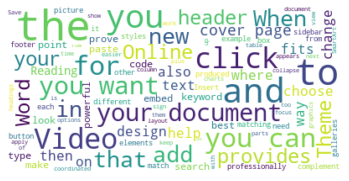

In [101]:
stopwords = set()
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

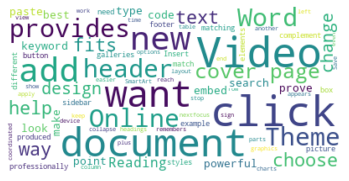

In [105]:
#with stopwords
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()